# Quantum Teleportation Algorithm

Teleportation is commonly perceived as a hypothetical process of instantaneous transfer of matter for a place to another without physical movement of the matter itself. In quantum computing, quantum teleportation means to transfer a qubit between entangled register. Between entangled states, information is transferred between the states instantaneously irrespective of the physical distance. The protocol was developed in 1993 by Bennett
and Brassard et al.; it was experimentally verified in 1997.

In this algorithm, we consider two individuals: Alice and Bob with entangled pair of qubit and we intend to transfer a qubit in state $|0>$. The entangled pair is also known as EPR pairs or Bell states In this specific algorithm, we try to transfer a random state from alice to bob. Here , Alice is the sender and she wishes to transmit the state of a qubit, $\psi$ to a reciever: Bob. 
The algorithm requires three qubits
in total. Let’s walk through the protocol in detail:

1. Create a three-qubit: Data qubit(D), Alice Qubit(A) and Bob qubit(B) on a quantum circuit
2. Initialize a state $\psi$ on a qubit D
3. Create a bell state between qubit A and B to create an entangled pair
3. Perform bell measurement on qubit D and Alice's entangled half A. It is done by applying CNOT gate on qubit A by qubit D(control bit is D and target is A) followed by Hadamard gate on D.
4. Measure data qubit and Alice's qubit and transfer the measured  classical data to bob
5. Perform certain tasks for each of four possible outcomes [00,01,10,11] on bob's entangled half, i.e. controlled operation on qubit B by the classical register. Following operations are applied

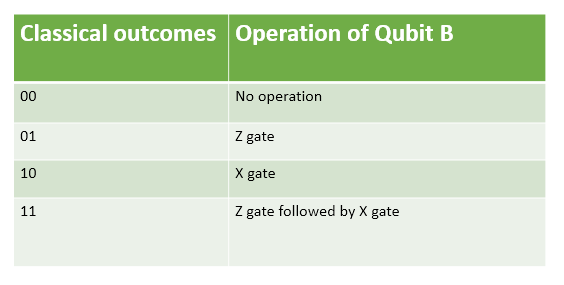

### Figure of the working principle

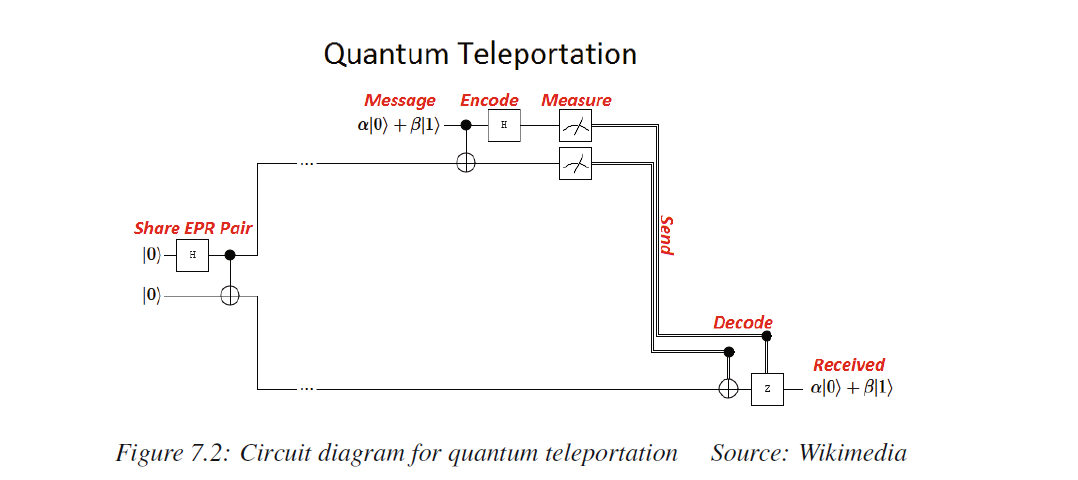

## Code for the algorithm

In [1]:
# import necessary functions and libraries
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from qiskit import QuantumCircuit, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import Aer
from qiskit.providers.aer import unitary_simulator
backend = Aer.get_backend('unitary_simulator')
simulator = Aer.get_backend('qasm_simulator')
statevector= Aer.get_backend('statevector_simulator')
%config InlineBackend.figure_format = 'svg' # Makes the images look nice


from qiskit.quantum_info import random_statevector

In [2]:
#Teleportation
qr= QuantumRegister(3)
cr= ClassicalRegister(1)
crz= ClassicalRegister(1)
tele= QuantumCircuit(qr,cr,crz) #Teleportation circuit

In [3]:
qr= QuantumRegister(3)
crx= ClassicalRegister(1)
crz= ClassicalRegister(1)
tele= QuantumCircuit(qr,crz,crx)
def bell_state(qc,a,b):      #bell state creation
    qc.h(a)
    qc.cx(a,b)
    return qc
def alice_gate(qc,psi,a):
    qc.cx(psi,a)      #cnot gate by psi to q1
    qc.h(psi)
    return qc
def measure_send(qc,a,b):
    """measure a and b and send to bob to further operation"""
    qc.measure(a,0)
    qc.measure(b,1)
    return qc
def bob_gate(qc,qubit,crz,crx):
    qc.z(qubit).c_if(crz,1)
    qc.x(qubit).c_if(crx,1)
    return qc
def random_state(qc,reg_entry):
    a=random_statevector(2)   # 2 = dimension
    random_state = a.data
    qc.initialize(random_state,reg_entry)
    return qc,random_state
def intermediate_print(qc):
    outvector=execute(qc,statevector).result().get_statevector(qc)
    return plot_bloch_multivector(outvector)
def finalres(qc):
    res=execute(qc,simulator).result().get_counts(qc)
    return plot_histogram(res)

In [4]:
# Test  of creation of random state vector(qubit state)
from qiskit.quantum_info import random_statevector
a=random_statevector(2)   # 2 = dimension

qc = QuantumCircuit(1,1)
initial_state = a.data
qc.initialize(initial_state,0)

qc.draw()

┌────────────────────────────────────────────────┐
q_0: ┤ initialize(0.67152+0.046471j,0.20174+0.71148j) ├
     └────────────────────────────────────────────────┘
c: 1/══════════════════════════════════════════════════

## The core Algorithm

░ ┌───────────────────────────────────────────────┐ ░      »
q2_0: ───────────░─┤ initialize(-0.7852+0.48358j,-0.1447+0.35871j) ├─░───■──»
      ┌───┐      ░ └───────────────────────────────────────────────┘ ░ ┌─┴─┐»
q2_1: ┤ H ├──■───░───────────────────────────────────────────────────░─┤ X ├»
      └───┘┌─┴─┐ ░                                                   ░ └───┘»
q2_2: ─────┤ X ├─░───────────────────────────────────────────────────░──────»
           └───┘ ░                                                   ░      »
c5: 1/══════════════════════════════════════════════════════════════════════»
                                                                            »
c4: 1/══════════════════════════════════════════════════════════════════════»
                                                                            »
c6: 3/══════════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌───┐ ░ ┌─┐    ░ 
«q2_0: ┤ H ├─░─┤M├────░─
«      └───┘ ░ └╥┘┌─┐ ░ 
«q2_1: ──────░──╫─┤M├─░─
«            ░  ║ └╥┘ ░ 
«q2_2: ──────░──╫──╫──░─
«            ░  ║  ║  ░ 
«c5: 1/═════════╩══╬════
«               0  ║    
«c4: 1/════════════╩════
«                  0    
«c6: 3/═════════════════
«

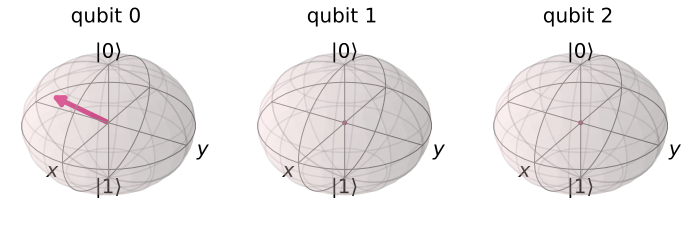

In [5]:
# Step 1
qr= QuantumRegister(3)
crx= ClassicalRegister(1)
crz= ClassicalRegister(1)
cr= ClassicalRegister(3)
tele= QuantumCircuit(qr,crz,crx,cr) #create quantum circuit

# Step 2: create Bell state
tele=bell_state(tele,1,2)
tele.barrier()
cpy1=tele.copy()

# Step 3: create random statevector
tele,psi=random_state(tele,0)
tele.barrier()
cpy2=tele.copy()

#Step 4: alice gate creation
tele=alice_gate(tele,0,1)
tele.barrier()
cpy3=tele.copy()

# Step 5: measure  1st and second qubit and store at classical register
tele=measure_send(tele,0,1)
cpy4=tele.copy()

tele.barrier()
display(tele.draw())
intermediate_print(cpy2)


In [6]:
# Step  : Apply controlled operation on bob's qubit
tele=bob_gate(tele,2,crz,crx)
cpy5=tele.copy()
display(tele.draw())

░ ┌───────────────────────────────────────────────┐ ░      »
q2_0: ───────────░─┤ initialize(-0.7852+0.48358j,-0.1447+0.35871j) ├─░───■──»
      ┌───┐      ░ └───────────────────────────────────────────────┘ ░ ┌─┴─┐»
q2_1: ┤ H ├──■───░───────────────────────────────────────────────────░─┤ X ├»
      └───┘┌─┴─┐ ░                                                   ░ └───┘»
q2_2: ─────┤ X ├─░───────────────────────────────────────────────────░──────»
           └───┘ ░                                                   ░      »
c5: 1/══════════════════════════════════════════════════════════════════════»
                                                                            »
c4: 1/══════════════════════════════════════════════════════════════════════»
                                                                            »
c6: 3/══════════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌───┐ ░ ┌─┐    ░               
«q2_0: ┤ H ├─░─┤M├────░───────────────
«      └───┘ ░ └╥┘┌─┐ ░               
«q2_1: ──────░──╫─┤M├─░───────────────
«            ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
«q2_2: ──────░──╫──╫──░──┤ Z ├──┤ X ├─
«            ░  ║  ║  ░  └─┬─┘  └─┬─┘ 
«               ║  ║    ┌──┴──┐   │   
«c5: 1/═════════╩══╬════╡ = 1 ╞═══╪═══
«               0  ║    └─────┘┌──┴──┐
«c4: 1/════════════╩═══════════╡ = 1 ╞
«                  0           └─────┘
«c6: 3/═══════════════════════════════
«

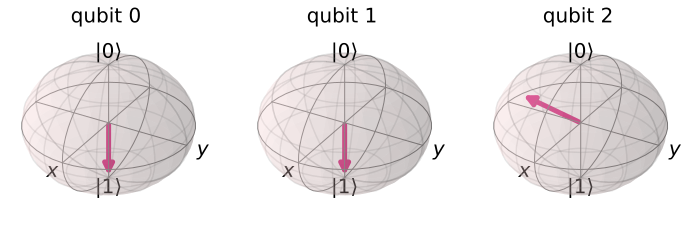

In [7]:
display(intermediate_print(tele))

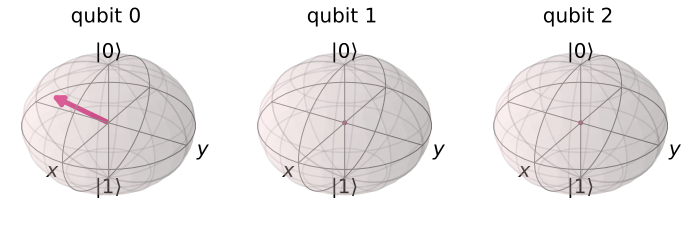

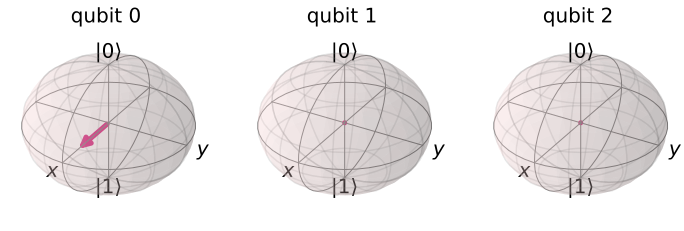

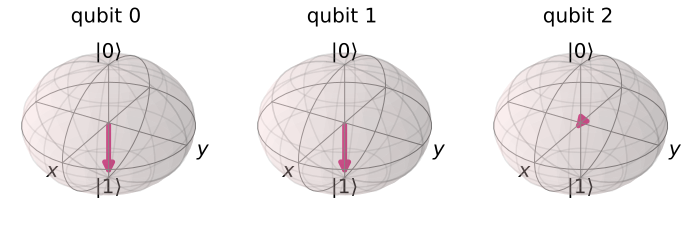

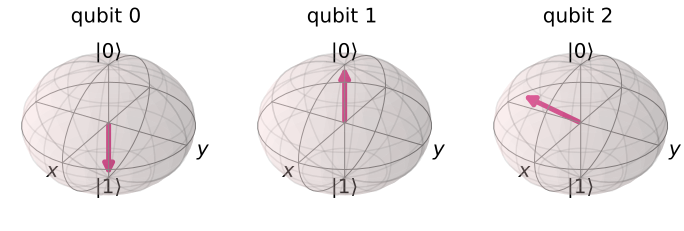

In [8]:
telet=[cpy2,cpy3,cpy4,cpy5]
for crkt in telet:
    outvector=execute(crkt,statevector).result().get_statevector(crkt)
    display(plot_bloch_multivector(outvector))


The Bloch vector above shows the evolution of state from evolution after initialization of random state vector to application of a set of operations on bob's qubit. We can see the 1st qubit at the 1st set exactly matches the 3rd qubit at the last set. This proves the qubit is teleported from Alice to Bob.

## Teleportation Succesful

In [9]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

### Reference

- C. H. Bennett, G. Brassard, C. Crépeau, R. Jozsa,A. Peres, and W. K. Wootters. Teleporting an unknown quantum state via dual classical and Einstein- Podolsky-Rosen channels. Phys. Rev. Lett., 70:1895– 1899, Mar 1993.
- Hidary, Jack. (2019). Quantum Computing: An Applied Approach. 10.1007/978-3-030-23922-0. 
- https://qiskit.org/textbook/preface.html